In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# Uploading csv file.
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [94]:
df.shape

(9827, 9)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [96]:
#Finding null values
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [34]:
#imputing null values with most_frquent values.
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit(df[['Vote_Average']])
df[['Vote_Average']] = imputer.transform(df[['Vote_Average']])

In [36]:
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [98]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [99]:
#converting Release_Date column into Datetime Dtype.
df['Release_Date']  = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [100]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtype

dtype('int32')

In [101]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [19]:
cols = ['Overview', 'Original_Language', 'Poster_Url' ]

In [20]:
df = df.drop(cols, axis = 1)

In [22]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

# Categorizing vote_avg Column
#  We could cut Vote_average column and make 4 categories: Popular, Average, Below-Average, Not-Popular.

In [ ]:
#Function Definition
#describe() is used to get key statistics min, 25%, 50%, 75%, max — these divide your data into 4 quartiles.
#used edges for categorization.
#pd.cut() segments the numerical values in col into ranges defined by these edges.
#labels are assigned to each bin (e.g., 'Not-Popular', 'Below-Average', etc.).
#duplicates='drop' avoids errors if any edge values are equal (e.g., min = 25%).

In [24]:
def categorize_col(df , col , labels):
    edges  = [df[col].describe()['min'],df[col].describe()['25%'],df[col].describe()['50%'],df[col].describe()['75%'],df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df


In [25]:
labels = ['Not-Popular', 'Below-Average', 'Average', 'Popular']
categorize_col(df, 'Vote_Average', labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below-Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,Popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,Not-Popular,Horror
9824,2016,The Offering,13.355,94,Not-Popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,Average,"Music, Drama, History"


In [26]:
df['Vote_Average'].unique()

['Popular', 'Below-Average', 'Average', 'Not-Popular', NaN]
Categories (4, object): ['Not-Popular' < 'Below-Average' < 'Average' < 'Popular']

In [39]:
df['Vote_Average'].value_counts()

Vote_Average
Not-Popular      2567
Popular          2450
Average          2412
Below-Average    2398
Name: count, dtype: int64

In [40]:
# Now split the genre into list and then explode our dataframe to have only one Genre per row
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [41]:
# Casting column into category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [42]:
df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

In [43]:
#Adds a white background with light gray grid lines to your plots.
sns.set_style('whitegrid')


# What is the most frequent genre of movies released on Netflix?

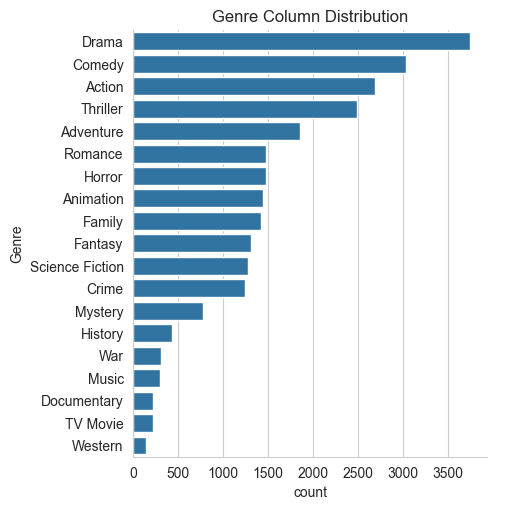

In [49]:
#Using seaborn Categorical plot 
sns.catplot(y = 'Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index)
plt.title('Genre Column Distribution')
plt.show()

# Which has highest Votes in Vote_Average Column?

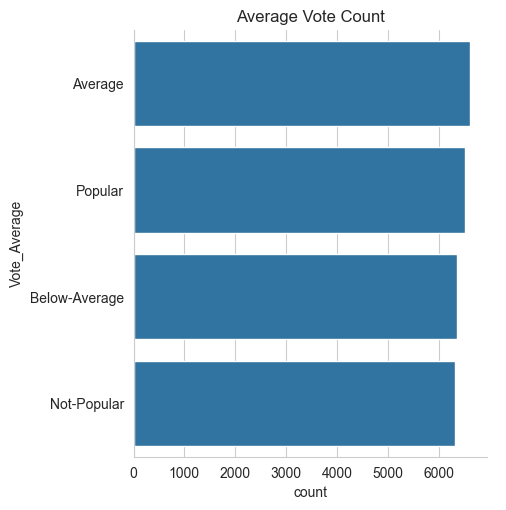

In [53]:
#Using Seaborn Categorical plot
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index)
plt.title('Average Vote Count')
plt.show()

# Which Genre has highest Votes? 

In [90]:
#cross tab analysis between categorical colummns.
cross_tab = pd.crosstab(df['Genre'],df['Vote_Average'])
cross_tab

Vote_Average,Average,Below-Average,Not-Popular,Popular
Genre,,,,
Action,680,702,777,527
Adventure,505,473,426,449
Animation,469,279,147,544
Comedy,773,820,836,602
Crime,311,334,270,327
Documentary,52,20,38,105
Drama,1011,784,641,1308
Family,440,342,276,356
Fantasy,322,318,289,379


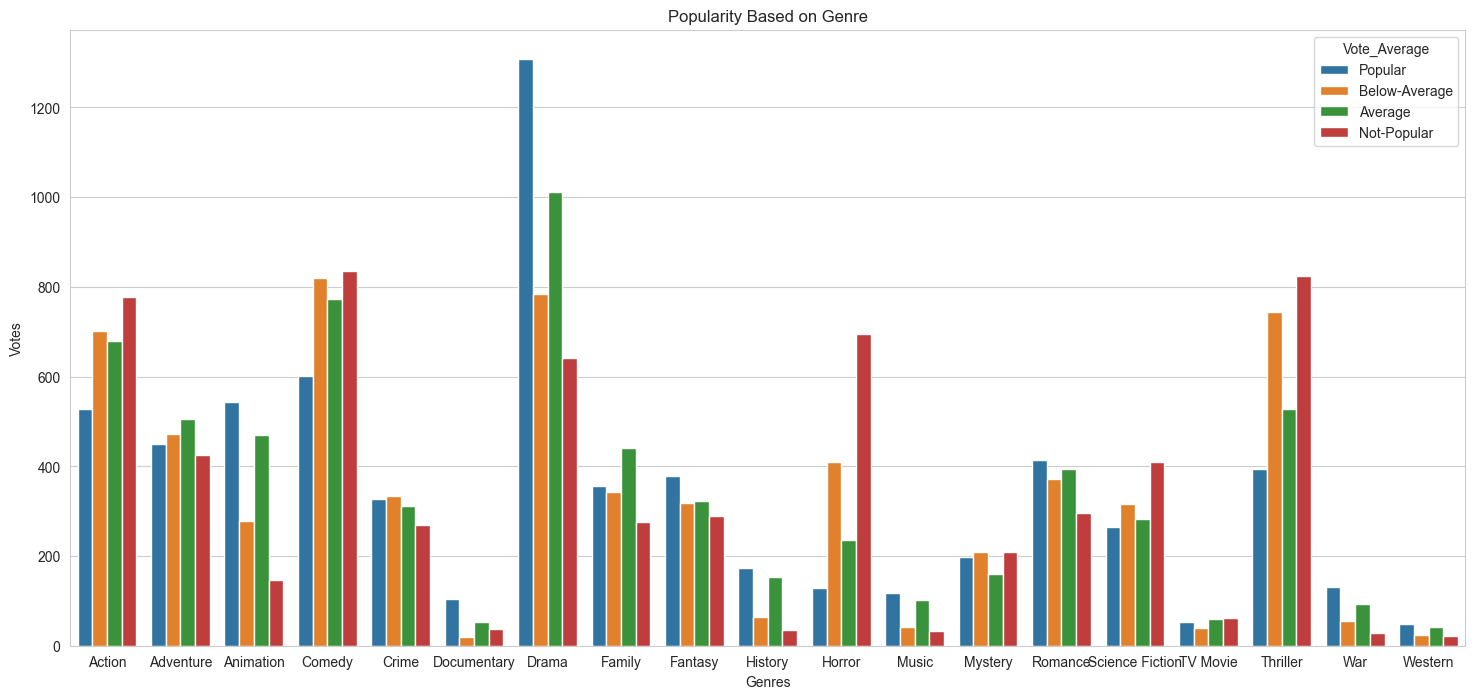

In [73]:
plt.figure(figsize=(18,8))
sns.countplot(x='Genre', hue = 'Vote_Average', data = df)
plt.title('Popularity Based on Genre')
plt.xlabel('Genres')
plt.ylabel('Votes')
plt.show()

# What movies got highest popularity?, what's it's Genre?

In [55]:
df.head(3)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


In [56]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


# Which movie got lowest popularity?

In [63]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25790,1984,Threads,13.354,186,Popular,War
25791,1984,Threads,13.354,186,Popular,Drama
25792,1984,Threads,13.354,186,Popular,Science Fiction


# Which year has most movies flimmed?

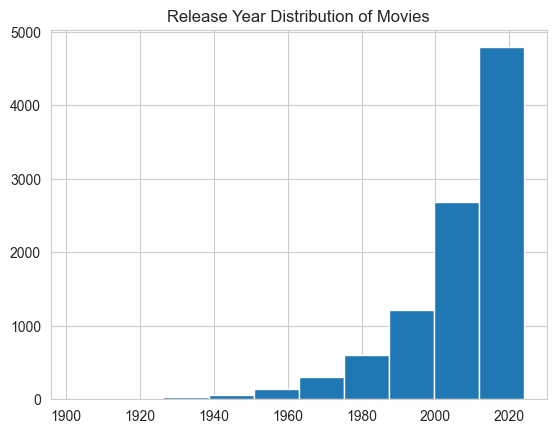

In [102]:
#plotting a histogram of movie release years
df['Release_Date'].hist()
plt.title('Release Year Distribution of Movies')
plt.show()

# Summary 

CONCLUSION:




Q1: What is the most frequent Genre in dataset?
    
    
Drama genre is the most frequent inour Dataset.
    
Q2: What genre has the highest votes?
   
    
Drama gets the highest popularity by fans.

Q3: What movie got highest popularity? what's it genre?
    
    
Spider-man No way home: has highest popularity in our dataset.

Q4 What movie got the Lowest popularity?
   
   
There are two movies which has equal lowest popularity: 'The United States vs. Billie Holiday', 'Threads' in our data set.

Q5 Which year has most movie flimmed?
   
   
Year 2020 has highest filming rate in our dataset.
    

    
